# Milestone 3 Notebook

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

## Table of Contents

1. **[Data Overview](#data-overview)**
    - 1.1 [Data Description](#data-description)
    - 1.2 [Data Summary](#data-summary)
2. **[Exploratory Data Analysis](#exploratory-data-analysis)**
    - 3.1 [Deeper Understanding of the Data](#deeper-understanding-of-the-data)
    - 3.2 [Meaningful Insights](#meaningful-insights)
    - 3.3 [Noteworthy Findings](#noteworthy-findings)
3. **[Research Question](#research-question)**
4. **[Baseline Model](#baseline-model)**


## Data Overview

### Data Description

In [45]:
train = pd.read_csv('./data/train_clean.csv')
test = pd.read_csv('./data/test_clean.csv')
data_dictionary = pd.read_csv('./data/Data_Dictionary.csv')
pd.set_option('display.max_columns', None)  #Make it display all columns

In [46]:

train.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,0.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,0,0,0,5,0,Yes,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,0,0,0,6,0,No,MILMIL414,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,0.0,0.0,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,0,0,0,6,0,No,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,0,0,0,9,1,Yes,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes


In [47]:
#Data size
print("Train data shape:", train.shape)
print(f"Test data shape:", test.shape)
print (f"Train data Percentage: {round(train.shape[0]/(train.shape[0] + test.shape[0]), 4)}")

Train data shape: (51047, 58)
Test data shape: (20000, 58)
Train data Percentage: 0.7185


In [48]:
#Descriptive Statistics
train.describe().round(2)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00
mean,3201956.88,58.67,524.65,46.74,0.89,39.87,1.22,-9.06,-0.89,6.01,4.09,28.29,1.87,0.30,114.80,25.38,8.18,90.55,67.65,10.16,0.01,1.84,18.76,1.53,1.35,1.81,1.56,380.54,30.94,20.85,0.04,0.02,0.05,4.32,0.05
std,116905.56,44.60,530.74,23.96,2.23,96.71,9.84,232.09,36.50,9.04,10.95,38.88,5.10,1.17,166.49,35.21,16.67,104.95,92.75,15.56,0.59,5.59,9.80,1.22,0.68,1.33,0.91,253.80,22.29,24.11,0.21,0.14,0.31,3.14,0.38
min,3000002.00,-119.35,-1251.00,-80.85,-6.62,-302.05,-52.99,-3875.00,-1107.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,1.00,0.00,0.57,1.00,-5.00,-62.07,-90.58,0.00,0.00,0.00,0.00,0.00
25%,3100632.00,33.52,158.00,30.00,0.00,0.00,0.00,-56.00,-3.90,0.70,0.00,5.30,0.00,0.00,8.30,3.30,0.00,23.00,11.00,1.70,0.00,0.00,11.00,1.00,1.00,1.00,1.00,205.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3201534.00,48.35,366.00,45.00,0.25,3.00,0.00,0.00,0.00,3.00,1.00,16.30,0.00,0.00,52.80,13.70,2.00,62.00,35.70,5.30,0.00,0.30,16.00,1.00,1.00,1.00,1.00,329.00,36.00,0.00,0.00,0.00,0.00,5.00,0.00
75%,3305376.00,70.97,723.00,60.00,0.99,41.00,0.30,39.00,0.40,7.70,3.70,36.30,1.70,0.30,153.50,34.00,9.30,121.30,88.70,12.30,0.00,1.30,24.00,2.00,2.00,2.00,2.00,515.00,48.00,42.00,0.00,0.00,0.00,7.00,0.00
max,3399994.00,1223.38,7359.00,400.00,159.39,4321.00,1112.40,5192.00,2483.50,221.70,384.30,848.70,327.30,66.00,2692.40,644.30,519.30,2090.70,1474.70,411.70,81.30,212.70,61.00,196.00,53.00,24.00,15.00,1812.00,99.00,99.00,4.00,3.00,35.00,9.00,25.00


In [49]:
#Data Types and missingness
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   MonthlyRevenue             51047 non-null  float64
 2   MonthlyMinutes             51047 non-null  float64
 3   TotalRecurringCharge       51047 non-null  float64
 4   DirectorAssistedCalls      51047 non-null  float64
 5   OverageMinutes             51047 non-null  float64
 6   RoamingCalls               51047 non-null  float64
 7   PercChangeMinutes          51047 non-null  float64
 8   PercChangeRevenues         51047 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

In [50]:
#No. Of missing vablues per variable
train.isnull().sum()

CustomerID                    0
MonthlyRevenue                0
MonthlyMinutes                0
TotalRecurringCharge          0
DirectorAssistedCalls         0
OverageMinutes                0
RoamingCalls                  0
PercChangeMinutes             0
PercChangeRevenues            0
DroppedCalls                  0
BlockedCalls                  0
UnansweredCalls               0
CustomerCareCalls             0
ThreewayCalls                 0
ReceivedCalls                 0
OutboundCalls                 0
InboundCalls                  0
PeakCallsInOut                0
OffPeakCallsInOut             0
DroppedBlockedCalls           0
CallForwardingCalls           0
CallWaitingCalls              0
MonthsInService               0
UniqueSubs                    0
ActiveSubs                    0
Handsets                      0
HandsetModels                 0
CurrentEquipmentDays          0
AgeHH1                        0
AgeHH2                        0
RetentionCalls                0
Retentio

In [51]:
# Separate quantitative and categorical variables
quantitative_columns = train.select_dtypes(include=['float64']).columns
quantitative_discrete_columns = train.select_dtypes(include=['int64']).columns
categorical_columns = train.select_dtypes(include=['object']).columns

print("\nQuantitative Variables:", list(quantitative_columns))
print("Total Quantitative-Continuous Variables:", len(quantitative_columns))

print("\nQuantitative Discrete Variables:", list(quantitative_discrete_columns))
print("Total Quantitative-Discrete Variables:", len(quantitative_discrete_columns))

print("\nCategorical Variables:", list(categorical_columns))
print("Total Categorical Variables:", len(categorical_columns))


Quantitative Variables: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']
Total Quantitative-Continuous Variables: 26

Quantitative Discrete Variables: ['CustomerID', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']
Total Quantitative-Discrete Variables: 9

Categorical Variables: ['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'O

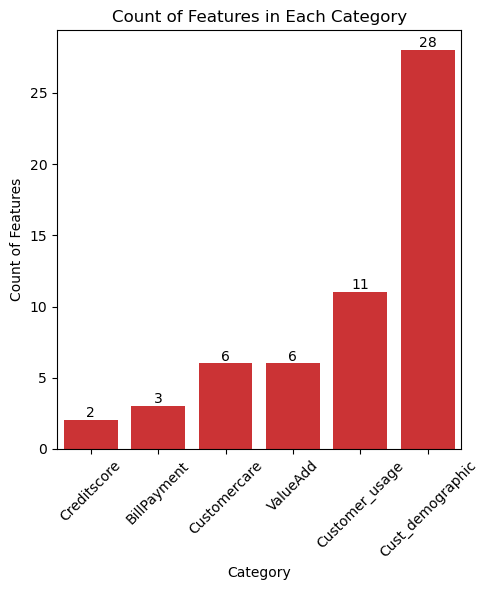

In [52]:
# Data for each dataframe and their respective features
dataframes = {
    "BillPayment": ["MonthlyRevenue", "TotalRecurringCharge", "PercChangeRevenues"],
    "Customercare": ["BlockedCalls", "CustomerCareCalls", "DroppedBlockedCalls", "RespondsToMailOffers", "OptOutMailings", "MadeCallToRetentionTeam"],
    "Creditscore": ["AdjustmentsToCreditRating", "CreditRating"],
    "Cust_demographic": ["MonthsInService", "UniqueSubs", "ActiveSubs", "ServiceArea", "Handsets", "HandsetModels", "CurrentEquipmentDays", "AgeHH1", "AgeHH2", "ChildrenInHH", "HandsetRefurbished", "HandsetWebCapable", "TruckOwner", "RVOwner", "Homeownership", "BuysViaMailOrder", "NonUSTravel", "OwnsComputer", "HasCreditCard", "NewCellphoneUser", "NotNewCellphoneUser", "ReferralsMadeBySubscriber", "IncomeGroup", "OwnsMotorcycle", "HandsetPrice", "PrizmCode", "Occupation", "MaritalStatus"],
    "Customer_usage": ["MonthlyMinutes", "OverageMinutes", "RoamingCalls", "PercChangeMinutes", "DroppedCalls", "UnansweredCalls", "ReceivedCalls", "OutboundCalls", "InboundCalls", "PeakCallsInOut", "OffPeakCallsInOut"],
    "ValueAdd": ["DirectorAssistedCalls", "ThreewayCalls", "CallForwardingCalls", "CallWaitingCalls", "RetentionCalls", "RetentionOffersAccepted"]
}


df_names = list(dataframes.keys())
feature_counts = [len(features) for features in dataframes.values()]


train_data_wcategory = pd.DataFrame({
    'Category': df_names,
    'Feature Count': feature_counts
}).sort_values(by='Feature Count')


plt.figure(figsize=(5, 6))
ax = sns.barplot(data=train_data_wcategory, x='Category', y='Feature Count')
# plt.xlabel('Data Category')
plt.ylabel('Count of Features')
plt.title('Count of Features in Each Category')
plt.xticks(rotation=45)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

### Data Summary

In [182]:
train.columns

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating', 'Churn', 'ServiceArea', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'N

In [183]:
binary_vars = train.columns[train.nunique() == 2]
categorical_vars = train.select_dtypes(include=['object']).columns
categorical_vars = list(set(categorical_vars) - set(binary_vars))

discrete_vars = train.select_dtypes(include=['int64']).columns
continuous_vars = train.select_dtypes(include=['float64']).columns

In [184]:
assert (
    len(binary_vars) + 
    len(categorical_vars) + 
    len(discrete_vars) + 
    len(continuous_vars) == len(train.columns)
)

#### Discrete Variables

In [185]:
discrete_vars[1:]

Index(['MonthsInService', 'UniqueSubs', 'ActiveSubs', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

In [186]:
import re

def split_camel_case(text):
    res = re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?=[A-Z][a-z]|$)', text)
    return ' '.join(res) 

In [187]:
column = discrete_vars[1]

counts = train[[column, "Churn"]].groupby('Churn').value_counts(normalize=True).reset_index()
counts = counts.sort_values(column)


In [188]:
counts[column].nunique()

56

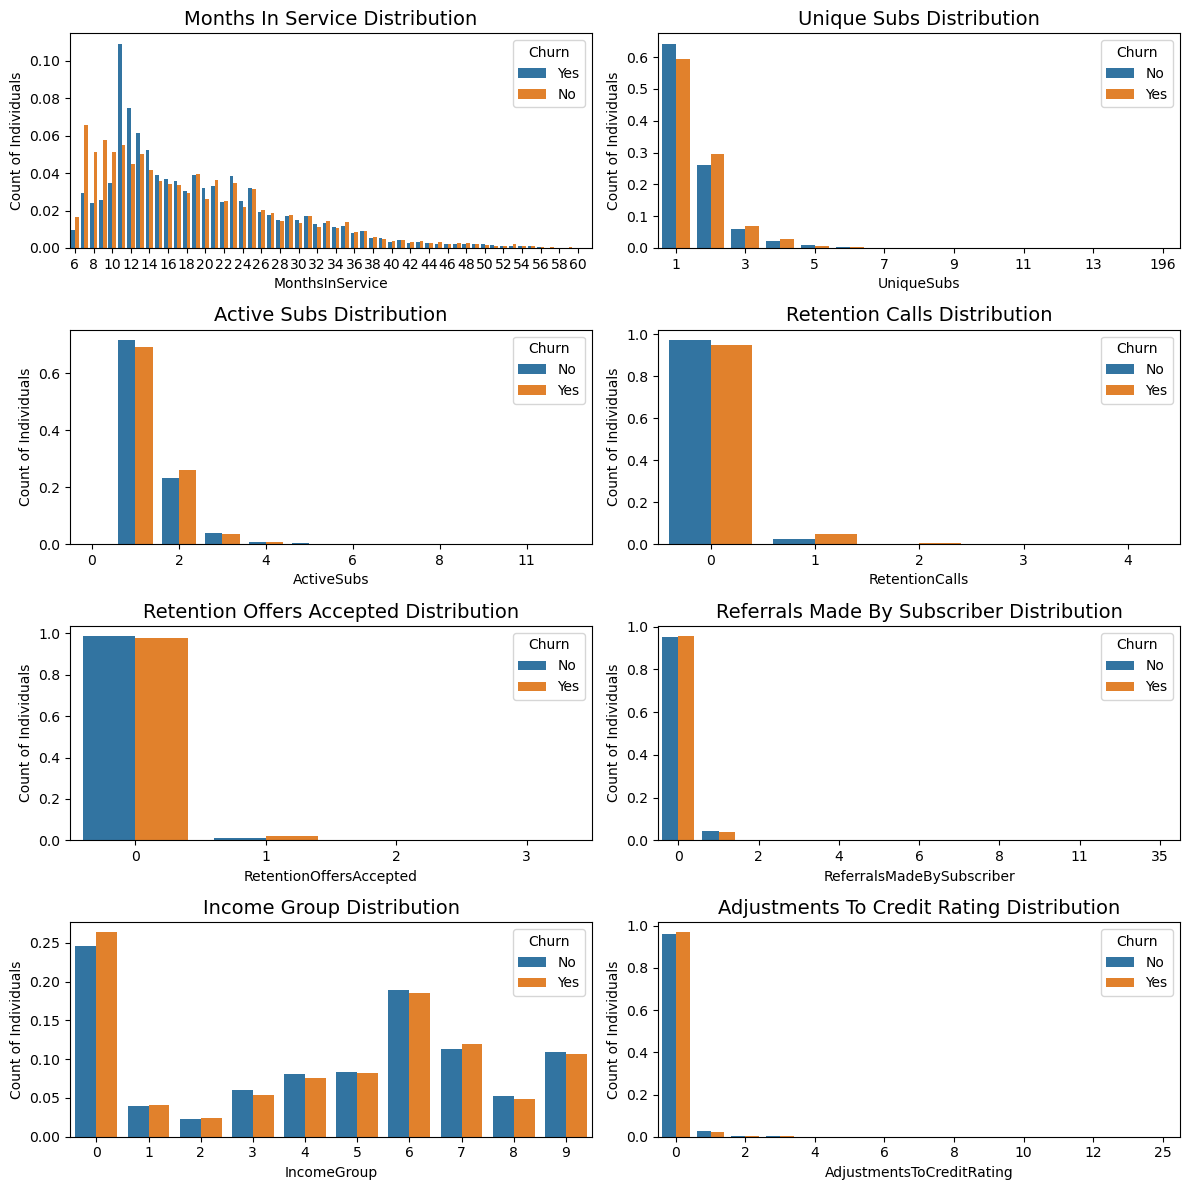

In [189]:
fig, ax = plt.subplots(4, 2, figsize=(12, 12))

for ax, column in zip(ax.ravel(), discrete_vars[1:]): # Drop ID
    counts = train[[column, "Churn"]].groupby('Churn').value_counts(normalize=True).reset_index()
    counts = counts.sort_values(column)

    sns.barplot(x=column, y='proportion', data=counts, ax=ax, hue="Churn")
    ax.set_title(f'{split_camel_case(column)} Distribution', fontsize=14)
    ax.set_ylabel('Count of Individuals')
    ax.set_xlabel(column)
    if counts[column].nunique() > 10:
        x_ticks = ax.get_xticks()
        ax.set_xticks(x_ticks[::2])

plt.tight_layout()

In [190]:
fig.savefig('./img/m3_fig1.png', format='png', dpi=300, bbox_inches='tight')

#### Categorical Variables

In [191]:
categorical_vars.remove('ServiceArea')

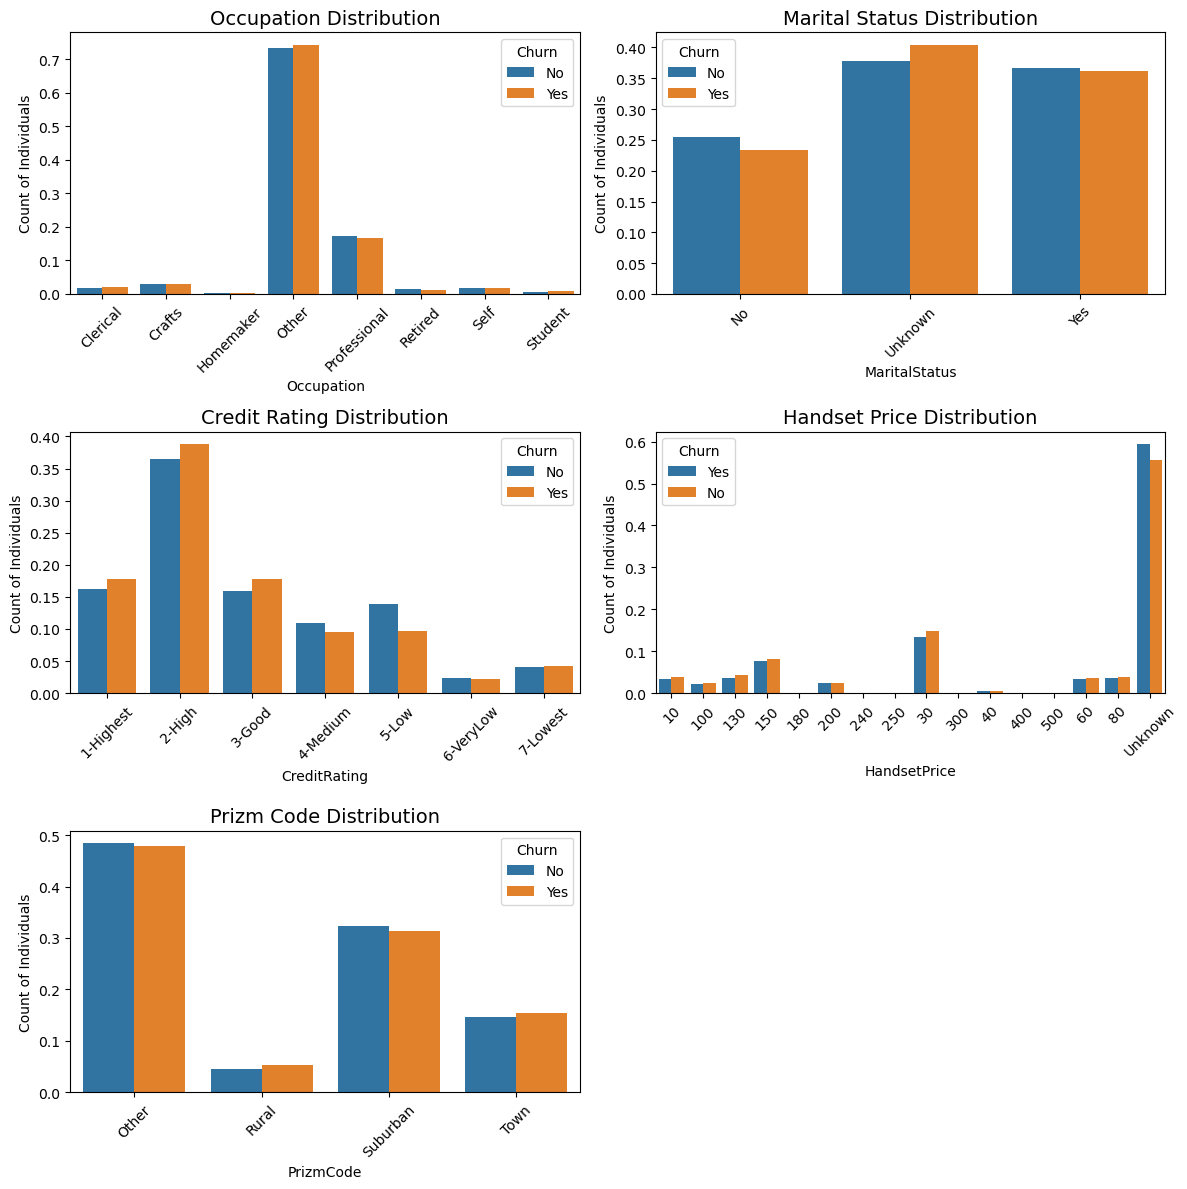

In [192]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

axes = ax.ravel()
for ax, column in zip(axes, categorical_vars): # Drop ID
    counts = train[[column, "Churn"]].groupby('Churn').value_counts(normalize=True).reset_index()
    counts = counts.sort_values(column)

    sns.barplot(x=column, y='proportion', hue="Churn", data=counts, ax=ax)
    ax.set_title(f'{split_camel_case(column)} Distribution', fontsize=14)
    ax.set_ylabel('Count of Individuals')
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=45)

axes[-1].set_visible(False)

plt.tight_layout()

In [193]:
fig.savefig('./img/m3_fig2.png', format='png', dpi=300, bbox_inches='tight')

#### Continous Variables

In [194]:
print (continuous_vars)
print (len(continuous_vars))

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2'],
      dtype='object')
26


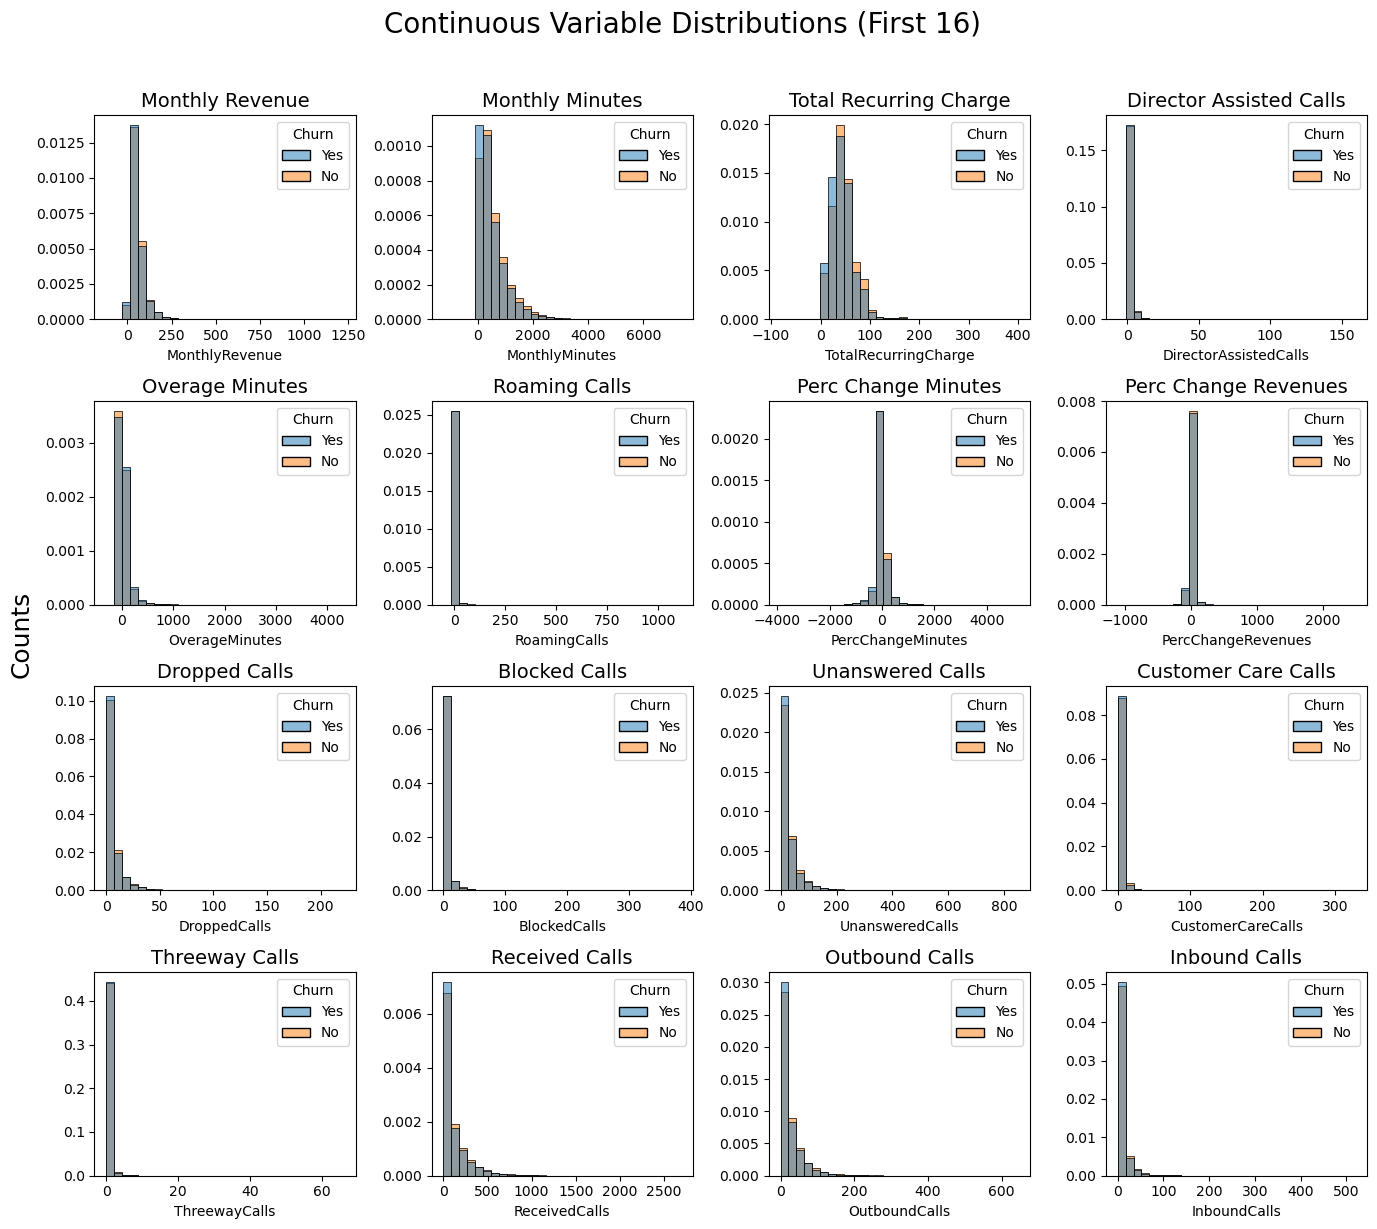

In [195]:
fig, ax = plt.subplots(4, 4, figsize=(14, 12))

for ax, column in zip(ax.ravel(), continuous_vars[:16]):
    sns.histplot(
        x=column, 
        data=train[[column, "Churn"]], 
        bins=30, 
        ax=ax, 
        hue="Churn", 
        stat="density", 
        common_norm=False
    )
    ax.set_title(f'{split_camel_case(column)}', fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel(column)
fig.supylabel('Counts', fontsize=18)
fig.suptitle('Continuous Variable Distributions (First 16)', fontsize=20, y=1.02)
plt.tight_layout()

In [196]:
fig.savefig('./img/m3_fig3a.png', format='png', dpi=300, bbox_inches='tight')

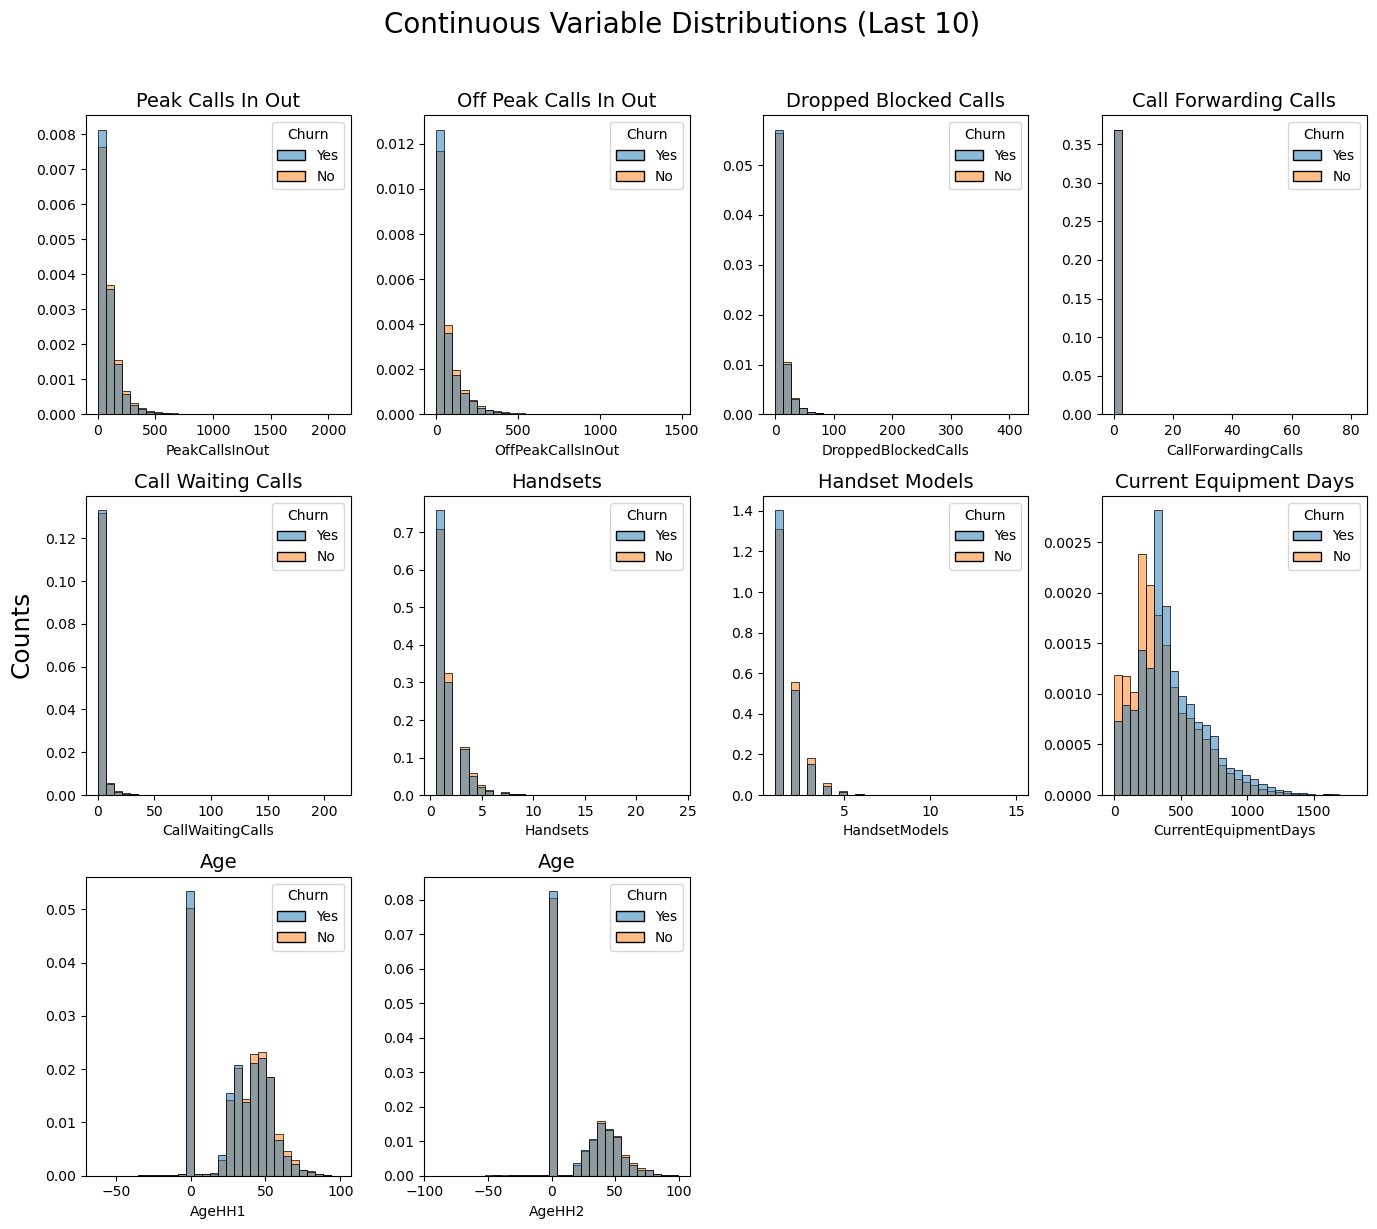

In [197]:
# Sorry for the redundant code

fig, ax = plt.subplots(3, 4, figsize=(14, 12))

axes = ax.ravel()
for ax, column in zip(axes, continuous_vars[16:]):
    sns.histplot(
        x=column, 
        data=train[[column, "Churn"]], 
        bins=30, 
        ax=ax, 
        hue="Churn", 
        stat="density", 
        common_norm=False
    )
    ax.set_title(f'{split_camel_case(column)}', fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel(column)
fig.supylabel('Counts', fontsize=18)
fig.suptitle('Continuous Variable Distributions (Last 10)', fontsize=20, y=1.02)
axes[-1].set_visible(False)
axes[-2].set_visible(False)
plt.tight_layout()

In [198]:
fig.savefig('./img/m3_fig3b.png', format='png', dpi=300, bbox_inches='tight')

#### Binary Variables

In [199]:
binary_vars[1:]

Index(['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam'],
      dtype='object')

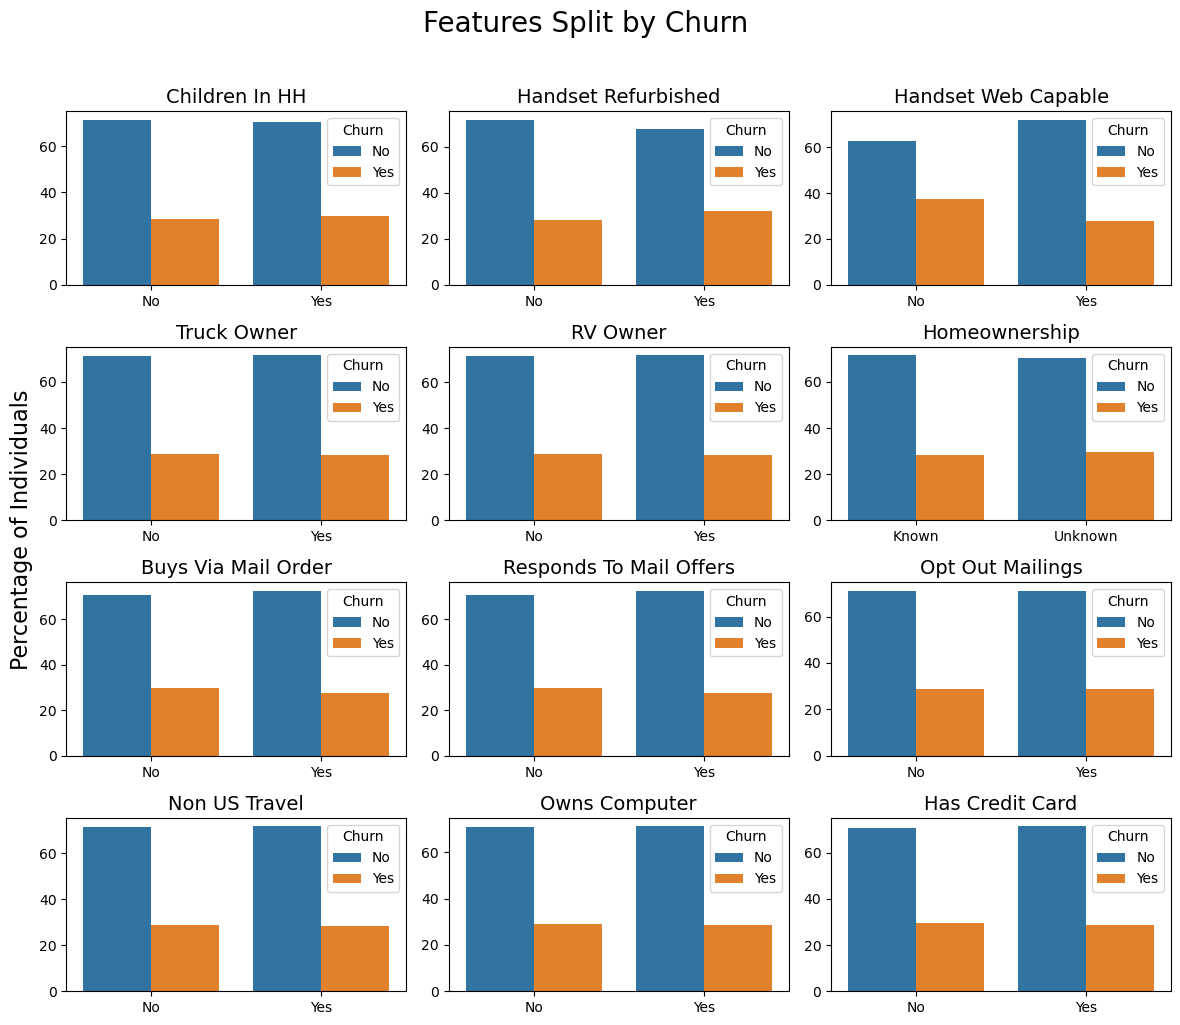

In [200]:
fig, ax = plt.subplots(4, 3, figsize=(12, 10))  

for ax, feature in zip(ax.ravel(), binary_vars[1:]):
    plot_data = train[[feature, "Churn"]]
    # Step 1: Count occurrences for each combination of 'sex' and 'admitted'
    grouped_data = plot_data.groupby([feature, "Churn"]).size().reset_index(name="count")
    grouped_data["percentage"] = grouped_data.groupby(feature)["count"].transform(lambda x: x / x.sum() * 100)
    
    _ = sns.barplot(
        x=feature, 
        y="percentage",
        hue="Churn",
        data=grouped_data,
        ax=ax
    )
    ax.set_title(f"{split_camel_case(feature)}", fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel("")

fig.supylabel("Percentage of Individuals", fontsize=16)
plt.suptitle("Features Split by Churn", fontsize=20, y=1.02)
plt.tight_layout()

In [201]:
fig.savefig('./img/m3_fig4.png', format='png', dpi=300, bbox_inches='tight')

## Exploratory Data Analysis

### Deeper Understanding of the Data

*While basic EDA is important, you should aim to provide a deeper understanding of the data through your analysis. This can be achieved by identifying patterns, trends, class imbalances, and outliers in the data. Additionally, explore the relationships between variables and identify any potential confounding variables that may impact the analysis.*

1. Trends: We explored the trend using the only temporal feature "MonthsInService"
   - Initial drop: The churn rate starts around 0.2, drops slightly.
   - Sharp increase: The churn rate increases sharply around the 10 month mark. This could indicate that the users may have some sort of contract that binds them for 10 months.
   - Stablizes: After the spike on the 10th month, churn rate slightly declines and stabilize hovering over 0.2 ~ 0.4 over the next several months.
   - Large fluctuation >50 months: Twards the end, the data shows heavy fluctuation and a spike at the end indicating a potential outlier.
3. Class imbalance: Class imbalance was previously identified and handeled in MS2
4. Outliers:
   - We can identify from the box plot and distribution plots that there are outliers in the dataset. Instead of removing the outliers right now, we'll use different methods such as (1) Cook's distance (if using linear regression) and (2) principal component analysis (PCA) to handle outliers. 
5. Relationship between variables:
   We found strong correlations between features that can lead to multicollinearity. (both shown in the heatmap and pairplots) Later we'll explore methods such as (1) removing one of the correlated features, (2) PCA, (3) feature selection to determine the best method to handle multicollinearity issue.
   - MonthlyRevenue & OverageMinutes: 0.786
   - MonthlyRevenue & MonthlyMinutes: 0.710
   - MonthlyMinutes & ReceivedCalls: 0.828


   However, we didn't find any feature that has direct correlation with Churn. This is interesting as we were expecting at least a weak correlation between some features and churn. It suggests that chrun might depend on more complex interactions between multiple features. 

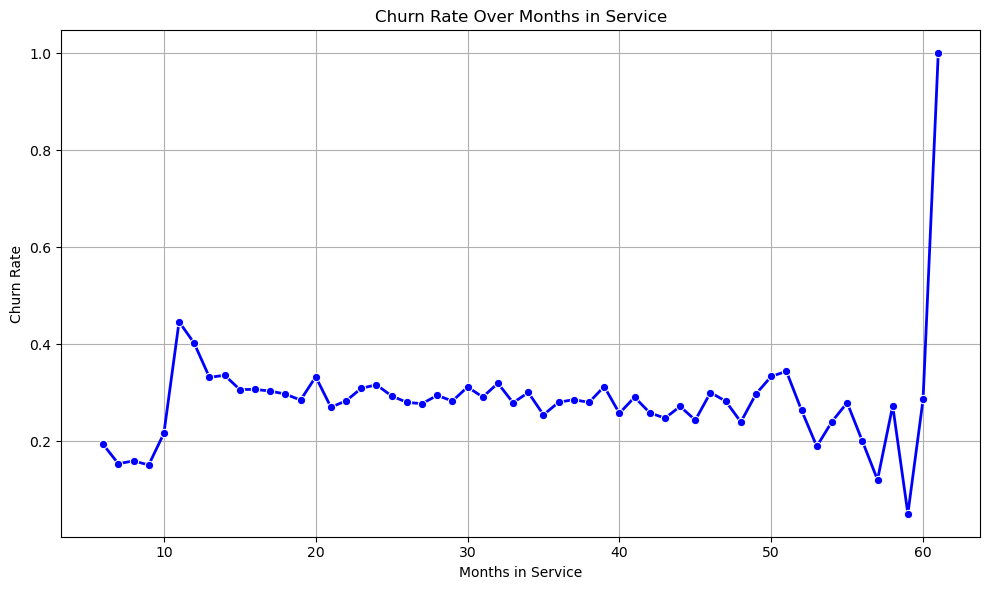

In [202]:
# Identifying the trend using time trended variable: "MonthsInSerivce"

train['Churn'] = train['Churn'].map({'Yes': 1, 'No': 0})
monthly_churn_rate = train.groupby('MonthsInService')['Churn'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthsInService', y='Churn', data=monthly_churn_rate, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Churn Rate Over Months in Service')
plt.xlabel('Months in Service')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.tight_layout()
plt.savefig('./img/m3_fig5.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [107]:
batches = list(zip(list(range(0, 31, 10)), list(range(0, 31, 10))[1:]))

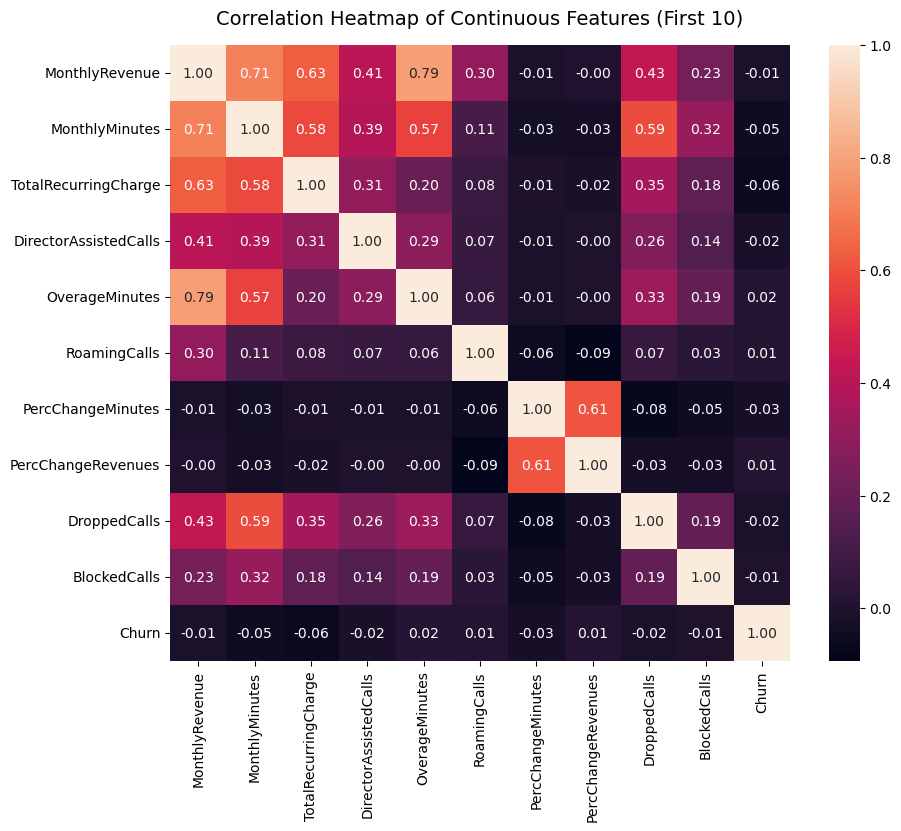

Strong correlations:
                        MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
MonthlyRevenue               1.000000        0.710404              0.631675   
MonthlyMinutes               0.710404        1.000000                   NaN   
TotalRecurringCharge         0.631675             NaN              1.000000   
DirectorAssistedCalls             NaN             NaN                   NaN   
OverageMinutes               0.785948             NaN                   NaN   
RoamingCalls                      NaN             NaN                   NaN   
PercChangeMinutes                 NaN             NaN                   NaN   
PercChangeRevenues                NaN             NaN                   NaN   
DroppedCalls                      NaN             NaN                   NaN   
BlockedCalls                      NaN             NaN                   NaN   
Churn                             NaN             NaN                   NaN   

                       Direct

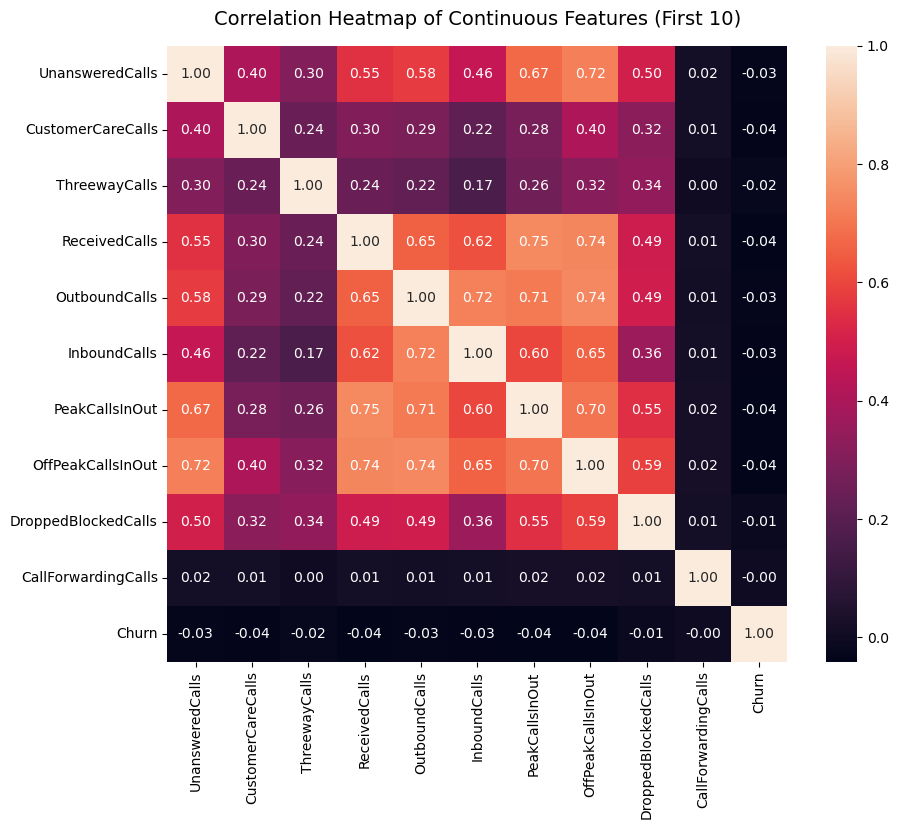

Strong correlations:
                      UnansweredCalls  CustomerCareCalls  ThreewayCalls  \
UnansweredCalls             1.000000                NaN            NaN   
CustomerCareCalls                NaN                1.0            NaN   
ThreewayCalls                    NaN                NaN            1.0   
ReceivedCalls                    NaN                NaN            NaN   
OutboundCalls                    NaN                NaN            NaN   
InboundCalls                     NaN                NaN            NaN   
PeakCallsInOut              0.674665                NaN            NaN   
OffPeakCallsInOut           0.719626                NaN            NaN   
DroppedBlockedCalls              NaN                NaN            NaN   
CallForwardingCalls              NaN                NaN            NaN   
Churn                            NaN                NaN            NaN   

                     ReceivedCalls  OutboundCalls  InboundCalls  \
UnansweredCalls       

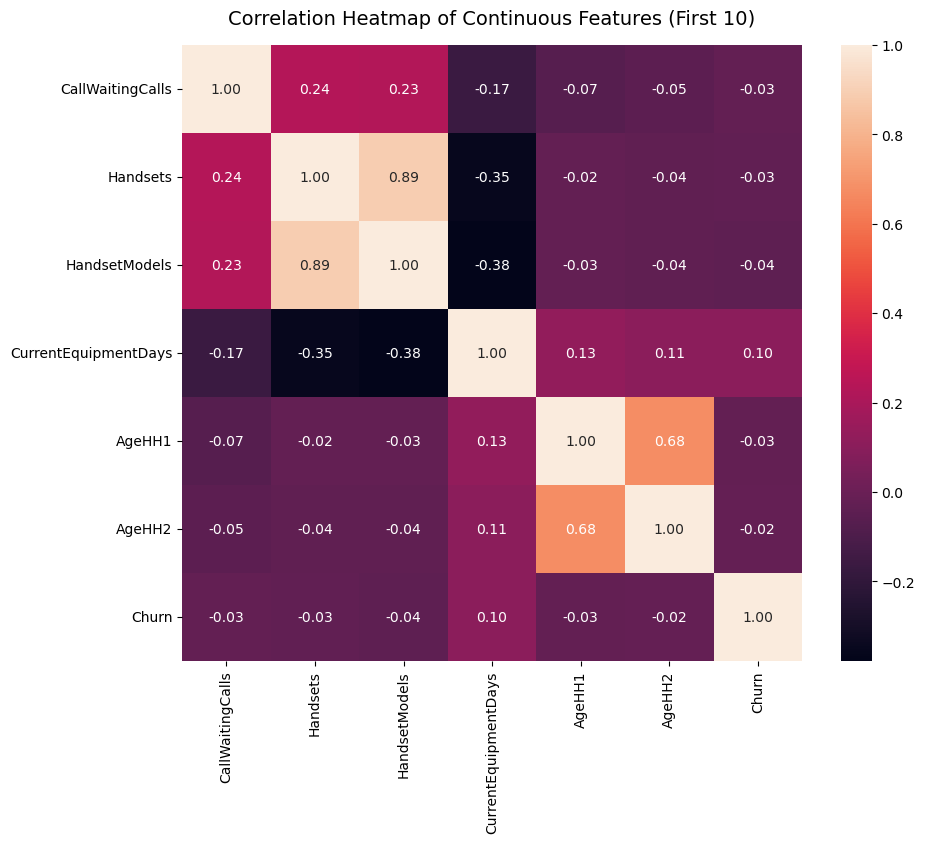

Strong correlations:
                       CallWaitingCalls  Handsets  HandsetModels  \
CallWaitingCalls                   1.0       NaN            NaN   
Handsets                           NaN  1.000000       0.887836   
HandsetModels                      NaN  0.887836       1.000000   
CurrentEquipmentDays               NaN       NaN            NaN   
AgeHH1                             NaN       NaN            NaN   
AgeHH2                             NaN       NaN            NaN   
Churn                              NaN       NaN            NaN   

                      CurrentEquipmentDays    AgeHH1    AgeHH2  Churn  
CallWaitingCalls                       NaN       NaN       NaN    NaN  
Handsets                               NaN       NaN       NaN    NaN  
HandsetModels                          NaN       NaN       NaN    NaN  
CurrentEquipmentDays                   1.0       NaN       NaN    NaN  
AgeHH1                                 NaN  1.000000  0.675109    NaN  
AgeHH2   

In [109]:
# Correlation heatmap for continuous variables

for letter, batch in zip(string.ascii_lowercase, batches):
    correlation_matrix = pd.concat([train[continuous_vars[batch[0]:batch[1]]], train['Churn']], axis=1).corr(method='pearson')
    fig, ax = plt.subplots(figsize=(10, 8))  
    sns.heatmap(
        correlation_matrix, 
        annot=True,
        fmt=".2f",
        ax=ax
    )
    ax.set_title('Correlation Heatmap of Continuous Features (First 10)', fontsize=14, y=1.02)
    plt.show();

    # Identify strong correlations (greater than 0.6 or less than -0.6)
    strong_corr = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]
    print("Strong correlations:\n", strong_corr)

    fig.savefig(f'./img/m3_fig6{letter}.png', format='png', dpi=300, bbox_inches='tight')

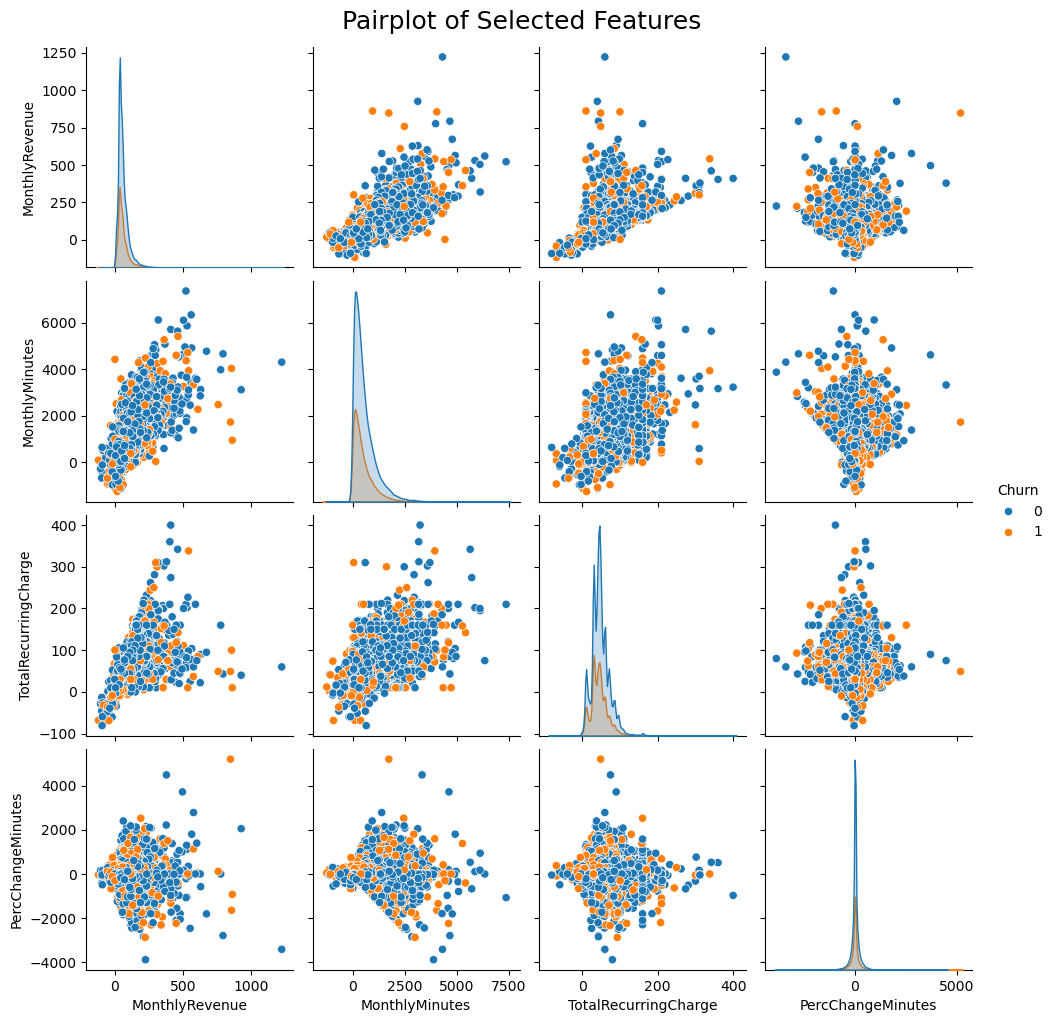

In [116]:
# Pairplot of selected features (can delete them if it is confusing)
pairplot = sns.pairplot(
    train[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'PercChangeMinutes', 'Churn']], 
    hue='Churn'
)
plt.suptitle('Pairplot of Selected Features', fontsize=18, y=1.02)
plt.show()

In [117]:
pairplot.savefig(f'./img/m3_fig7.png', format='png', dpi=300, bbox_inches='tight')

### Meaningful Insights

The EDA report should provide meaningful insights that can be connected back to the problem at hand. These insights should be well-supported by the data and provide actionable recommendations for addressing the problem. You should focus on providing insights that are relevant to the project question and will add value to the final analysis.

In [111]:
# I think the "deeper analysis" part actually answered all the meaningful insights section. Let me know if I should be adding more details here! 

### Noteworthy Findings

Summarize the noteworthy findings of their EDA in a clear and concise manner. This can be achieved through the use of visualizations and captions that highlight the most important insights gained through the analysis.

### 1. Service Quality Impact
- Based on the correlation heatmap and pair plot, we don’t see a strong direct correlation between `DroppedCalls` and `Churn`. This suggests that while service quality could impact churn, `DroppedCalls` alone does not show a significant linear relationship with churn.

### 2. Financial Patterns
- **Revenue & Charges**: The correlation heatmap shows a strong relationship between `MonthlyRevenue` and `OverageMinutes` (0.79), as well as `MonthlyRevenue` and `MonthlyMinutes` (0.71). 
- **Churn Correlation**: There is a very weak or negligible correlation between financial variables like `MonthlyRevenue`, `TotalRecurringCharge`, and churn, suggesting that churn is likely influenced by more complex interactions of these variables rather than a single factor.

### 3. Demographic Insights
- **Credit Rating**: Credit rating distribution shows a higher density of churn among customers with a medium (2-High) credit rating.
- **Income Group**: Income Group 6 has the highest representation, while Income Group 0 shows a more varied churn rate.

### 4. Continuous Variables Analysis
- **Monthly Revenue**: The distribution is heavily right-skewed, with most customers having a monthly revenue below.
- **Monthly Minutes**: Similarly right-skewed, showing that most customers have low usage, but a few consume a large number of minutes.
- **Total Recurring Charge**: Right-skewed distribution suggests that most customers have low recurring charges.

### 5. Churn Trends Over Time
- **10-Month Spike**: The churn rate chart shows a significant increase around the 10-month mark, possibly indicating a contract or milestone prompting churn.
- **Long-Term Fluctuations**: After stabilizing around 20-40% for most of the service period, churn rate experiences fluctuations after 50 months, with a sharp peak at the end. 

### 6. Correlation Insights
- **Feature Correlations**: The heatmap shows strong correlations between features like `MonthlyRevenue` & `OverageMinutes` (0.79) and `MonthlyMinutes` & `ReceivedCalls` (0.83), indicating potential multicollinearity, which might need addressing in modeling.
- **No Strong Correlation with Churn**: None of the variables exhibit a strong correlation with churn.


## Research Question

Based on the insights gained through EDA, you should develop a clear project question that will guide your analysis. This question should be well-defined and specific to the problem at hand.

1. **"What variables influence churn, and how can these factors be effectively used to predict customer churn?"**

2. **"How do service usage patterns and financial characteristics, such as monthly revenue and overage charges, impact customer churn rates?"**

3. **"What role do demographic factors (such as income, location, and credit rating) play in predicting customer churn?"**



## Baseline Model

In [22]:
pass